<a href="https://colab.research.google.com/github/sam-marhaendra/Image-Classification_Klasifikasi-Gambar-Pakaian/blob/main/Image_Classification_Klasifikasi_Gambar_Pakaian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


# ***IMPORT DATASET FASHION MIST***

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Dilakukan penyimpanan nama kelas dikarenakan nama kelas tidak tersedia dalam dataset

# ***EKSPLORASI DATA***

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

Dari eksplorasi data di atas, didapatkan informasi bahwa selain terdapat 60000 gambar, terdapat juga 60000 label di dalam training set, dengan setiap labelnya yaitu merupakan bilangan integer antara 0 dan 9. Selain itu, Terdapat juga 10000 gambar di dalam test set yang direpresentasikan sebagai 28 x 28 pixel

# ***DATA PREPROCESSING***

<function matplotlib.pyplot.show>

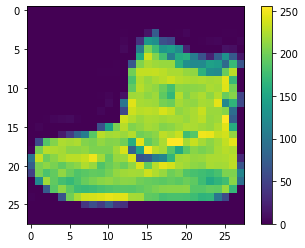

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show

Mengubah nilai pixel (awalnya berada di rentang antara 0 sampai dengan 255) menjadi rentang 0 sampai dengan 1

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Menampilkan 10 gambar pertama dari training set dan menampilkan nama kelas di bawah setiap gambar guna memastikan bahwa data sudah dalam format yang benar

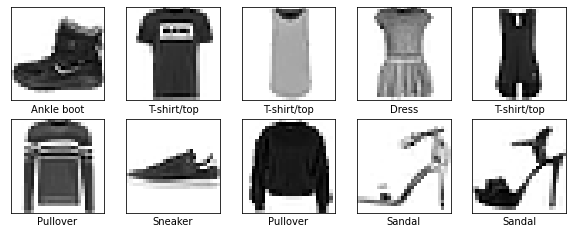

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

# ***MEMBANGUN MODEL***

**Konfigurasi Layer**

Layer pertama melakukan transformasi dari format gambar yang mulanya array 2 dimensi (28 x 28 pixel) menjadi array 1 dimensi (28 * 28 = 784 pixel)

Layer kedua (128 node) dan ketiga (10 node *softmax* merupakan model yang akan dibuat. Layer terakhir ini mengembalikan array dari 10 nilai probabilitas yang apabila dijumlahkan hasilnya adalah 1.

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

**Proses Kompilasi Model**

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ***PROSES TRAINING MODEL***

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5031 - accuracy: 0.8232
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3798 - accuracy: 0.8628
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3395 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3153 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2978 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2801 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2698 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2593 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2517 - accuracy: 0.9058
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

Model ini mencapai akurasi sekitar 88% terhadap data training

# ***EVALUASI NILAI DARI AKURASI***

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest Accuracy:', test_acc)

313/313 - 0s - loss: 0.3281 - accuracy: 0.8827

Test Accuracy: 0.8827000260353088


Model yang dibuat menghasilkan tingkat akurasi yang sedikit lebih kecil pada data test dibandingkan pada data training

# ***MEMBUAT PREDIKSI***

In [ ]:
prediksi = model.predict(test_images)

In [ ]:
prediksi[0]

array([3.2401322e-06, 6.1912908e-10, 5.6827025e-07, 2.3578959e-06,
       2.1006008e-08, 3.9543328e-04, 3.0323125e-07, 1.2816793e-02,
       8.4526874e-07, 9.8678046e-01], dtype=float32)

In [ ]:
np.argmax(prediksi[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, prediksi_array, true_label, img):
  prediksi_array, true_label, img = prediksi_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(prediksi_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
             100*np.max(prediksi_array),
             class_names[true_label]),
             color=color)

def plot_value_array(i, prediksi_array, true_label):
  prediksi_array, true_label = prediksi_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), prediksi_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(prediksi_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

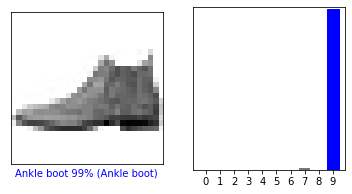

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediksi[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediksi[i], test_labels)
plt.show()

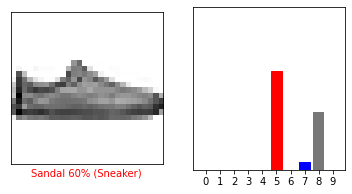

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediksi[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediksi[i], test_labels)
plt.show()

membuat plot beberapa gambar dengan prediksinya (warna prediksi benar yaitu biru dan warna prediksi salah yaitu merah)

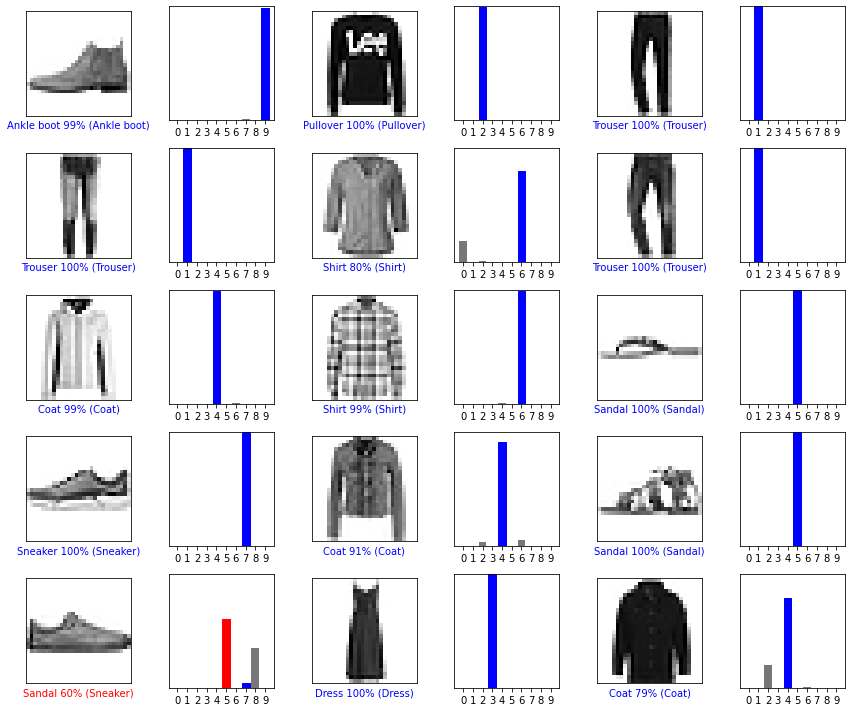

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediksi[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediksi[i], test_labels)
plt.tight_layout()
plt.show()

# ***MENGGUNAKAN MODEL UNTUK MEMBUAT PREDIKSI TERHADAP SEBUAH GAMBAR***

In [ ]:
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
prediksi_single = model.predict(img)

print(prediksi_single)

[[1.08783184e-04 9.20942128e-14 9.98056471e-01 7.25144345e-09
  1.05639279e-03 3.44158499e-14 7.78332644e-04 1.00641507e-13
  3.72279541e-10 5.69039000e-12]]


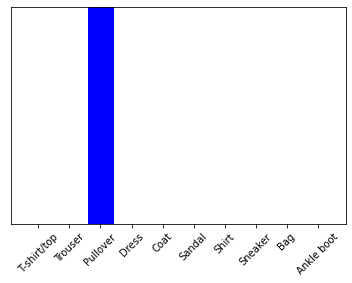

In [ ]:
plot_value_array(1, prediksi_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(prediksi_single[0])

2